<a href="https://colab.research.google.com/github/fransarubbi/Data-Communication/blob/master/Transformada_Fourier_Pulso_Unico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de FFT de Pulso Único: Explorando la relación entre  la duración del pulso y el Ancho de Banda y los efectos Retardo en el Tiempo.

Comunicación de Datos -  Ing. Computación

Universidad Nacional de San Luis

2024



**Objetivos:**
1. Comprender el efecto de la duración del pulso en la representación de su FFT.
2. Explorar la influencia del retardo en el tiempo en la FFT de un pulso único.


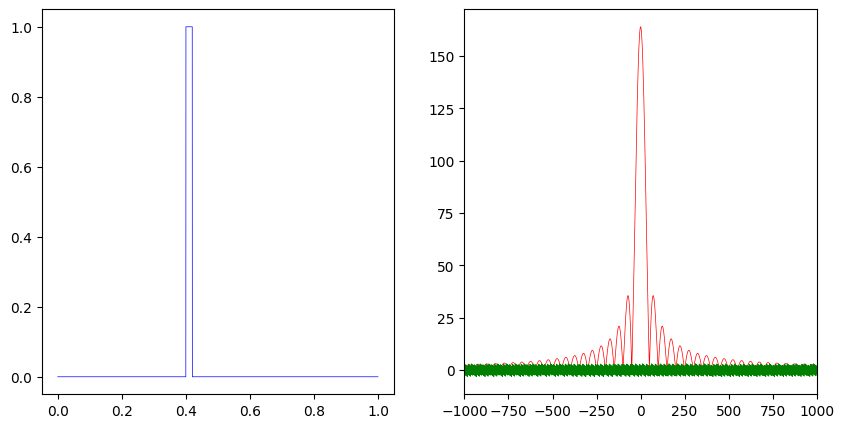

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from mpl_toolkits.mplot3d import Axes3D


# Este código en Python genera y grafica una señal en el dominio del tiempo y
# su Transformada Rápida de Fourier (FFT) en el dominio de la frecuencia

# Parámetros de simulación
Fs = 8192        # frecuencia de muestreo   (8192)
tmax=8192/Fs     # duracion de la señal en segundos

retardo=0.4        # tiempo de inicio del pulso en segundos   (0.8)
duracion=0.02      # duracion del pulso en segundos    (0.01)
amplitud = 1

# Instantes de muestreo de la señal
t = np.arange(0, tmax, step=1. / Fs)   # t contiene los instantes de muestreo desde 0 hasta tmax con pasos de 1/Fs


# Generación de la señal
pu=t-t
pu[round(retardo*Fs):round((retardo+duracion)*Fs)]= amplitud    # establece el valor 1 en pu desde el índice correspondiente
# a retardo hasta el índice correspondiente a retardo + duracion, creando un pulso rectangular


# Grafico de la señal en el dominio del tiempo
fig = plt.figure(figsize=[10,5])
ax_t = fig.add_subplot(121)
ax_t.plot(t, pu, c='b',linewidth=0.5)
# Calcular la FFT de la señal
fft_result = np.fft.fft(pu)
fft_shifted = np.fft.fftshift(fft_result)  # Desplazar la FFT para que la frecuencia 0 esté en el centro

# Crear vector de frecuencias desplazadas
frequencies = np.fft.fftfreq(len(pu), 1/Fs)
frequencies_shifted = np.fft.fftshift(frequencies)

# Graficar la FFT
ax_f= fig.add_subplot(122)
ax_f.axes.set_xlim(left=-1000, right=1000)
ax_f.plot(frequencies_shifted, np.abs(fft_shifted), 'r',linewidth=0.5)
ax_f.plot(frequencies_shifted, np.angle(fft_shifted),'g', linewidth=0.5)




<Figure size 640x480 with 0 Axes>

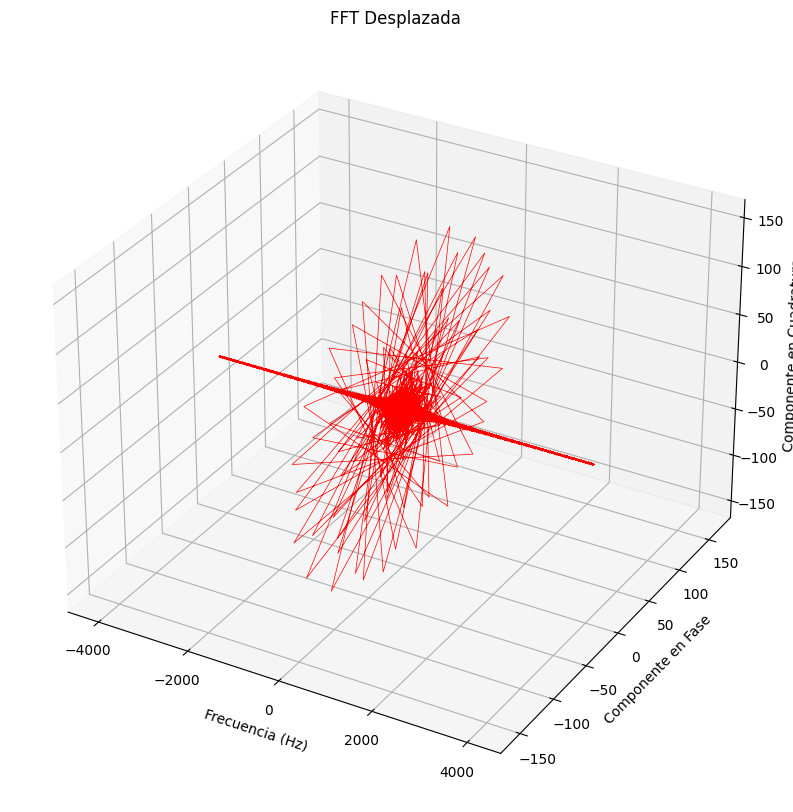

In [11]:



# Graficar la FFT en 3D
fig = plt.figure()
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio 3D
ax.plot(frequencies_shifted, np.real(fft_shifted), np.imag(fft_shifted), c='r', linewidth=0.5)

# Etiquetas de los ejes
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Componente en Fase')
ax.set_zlabel('Componente en Cuadratura')

# Título del gráfico
plt.title('FFT Desplazada')

# Mostrar gráfico
plt.show()


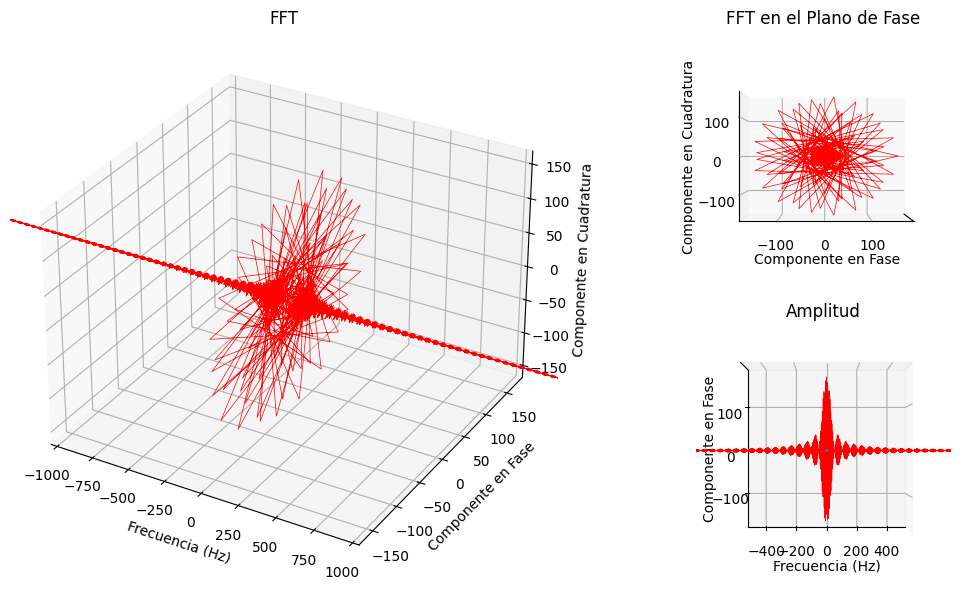

In [9]:

# Graficar la FFT en 3D
fig = plt.figure(figsize=(12, 6))

# Subgráfico 3D principal
ax = fig.add_subplot(121, projection='3d')
ax.plot(frequencies_shifted, np.real(fft_shifted), np.imag(fft_shifted), c='r',marker='', linewidth=0.5)
ax.axes.set_xlim3d(left=-1000, right=1000)
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel('Componente en Fase')
ax.set_zlabel('Componente en Cuadratura')
ax.set_title('FFT')

# Subgráfico 2D amplitud
ax_ampl = fig.add_subplot(222, projection='3d')
ax_ampl.view_init(elev=0, azim=0, roll=0)
ax_ampl.plot(frequencies_shifted, np.real(fft_shifted), np.imag(fft_shifted), c='r',marker='', linewidth=0.5)
ax_ampl.set_ylabel('Componente en Fase')
ax_ampl.set_zlabel('Componente en Cuadratura')
ax_ampl.set_title('FFT en el Plano de Fase')
ax_ampl.axes.set_xlim3d(left=-1000, right=1000)
ax_ampl.set_xticks([])


# Subgráfico 2D plano fase
ax_phase = fig.add_subplot(224, projection='3d')
ax_phase.view_init(elev=90, azim=0, roll=90)
ax_phase.plot(frequencies_shifted, np.real(fft_shifted), np.imag(fft_shifted), c='r',marker='', linewidth=0.5)

ax_phase.set_xlabel('Frecuencia (Hz)')
ax_phase.set_ylabel('Componente en Fase')

ax_phase.set_title('Amplitud')
ax_phase.plot(t, pu)

ax_phase.set_zticks([])
ax_phase.axes.set_xlim3d(left=-500, right=500)

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

**Actividad**: repetir para diferentes valores de amplitud, duración, retardo y analizar los resultados obtenidos.

Cambiar los valores de amplitud, duración y retardo de la señal de pulso rectangular afectará tanto la representación en el dominio del tiempo como la representación en el dominio de la frecuencia (FFT). La amplitud de la señal de pulso rectangular está fijada en 1 (es decir, el pulso toma el valor de 1 durante su duración). Si la amplitud se cambia, por ejemplo, a un valor diferente de 1, afectará la magnitud de la FFT pero no la estructura de las frecuencias presentes. En la práctica:
- Mayor amplitud incrementa la magnitud de todos los componentes de frecuencia en la FFT. Los picos en la grafica de magnitud de la FFT son mas altos.
- Menor amplitud disminuira la magnitud de todos los componentes de frecuencia en la FFT. Los picos en la grafica de magnitud de la FFT son mas bajos.

La duración del pulso rectangular determina cuánto tiempo dura el pulso en la señal temporal. Cambiar la duración tiene los siguientes efectos:
- Mayor duracion hace que el pulso sea más largo en el dominio del tiempo. En el dominio de la frecuencia, esto resulta en un espectro de frecuencia más estrecho con picos más cercanos entre sí.
- Menor duracion hace que el pulso sea más corto en el dominio del tiempo. En el dominio de la frecuencia, esto resulta en un espectro de frecuencia más amplio con picos más separados entre sí.

El retardo del pulso rectangular es el tiempo antes de que el pulso comience. Cambiar el retardo afecta la fase de los componentes de frecuencia en la FFT pero no la magnitud:
- Mayor retardo desplaza el pulso hacia adelante en el tiempo. En la FFT, esto cambia las fases de los componentes de frecuencia sin alterar sus magnitudes.
- Menor retardo desplaza el pulso hacia atrás en el tiempo. En la FFT, esto también cambia las fases de los componentes de frecuencia sin alterar sus magnitudes.


Observaciones:
- Amplitud: Cambia la magnitud de las componentes de frecuencia sin afectar su distribución.
- Duración: Afecta la anchura del espectro de frecuencia.
- Retardo: Afecta la fase de las componentes de frecuencia pero no su magnitud.

## Transformada de Hilbert



In [4]:
analytic_signal = hilbert(pu)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * Fs)


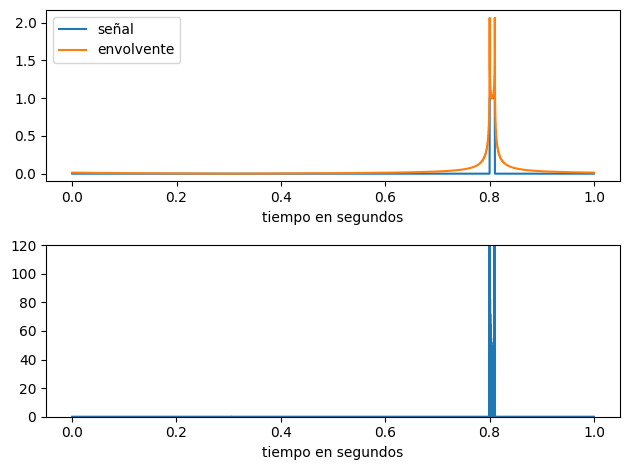

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, pu, label='señal')
ax0.plot(t, amplitude_envelope, label='envolvente')
ax0.set_xlabel("tiempo en segundos")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("tiempo en segundos")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()